<a href="https://colab.research.google.com/github/charlesyoo/2023-Predictive-Analytics/blob/main/diamonds_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pickle

sns.set()

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/charlesyoo/ML-Data/main/diamonds.csv')

In [ ]:
#Mapping the cut column

cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

In [ ]:
data['cut_numeric'] = data['cut'].map(cut_mapping)

In [ ]:
#creating clarity mapping

clarity_mapping = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}

In [ ]:
data['clarity_numeric'] = data['clarity'].map(clarity_mapping)

In [ ]:
# creating color mapping

color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}

In [ ]:
data['color_numeric'] = data['color'].map(color_mapping)

In [ ]:
data.drop(columns=['color_mapping'])

KeyError: ignored

In [11]:
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numeric,clarity_numeric,color_numeric
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,2,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,3,6


In [12]:
df = data[['carat', 'depth', 'table', 'cut_numeric', 'clarity_numeric', 'color_numeric','price']]

In [13]:
x = df[['carat', 'depth', 'table', 'cut_numeric', 'clarity_numeric', 'color_numeric']].values
y = df['price'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=30 )

In [15]:
model = Sequential()
model.add(Dense(25, input_dim= x.shape[1], activation= 'relu'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(1))

In [16]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)

In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 10000 )

Epoch 1/10000
1518/1518 - 6s - loss: 19598738.0000 - val_loss: 15699588.0000 - 6s/epoch - 4ms/step
Epoch 2/10000
1518/1518 - 5s - loss: 15445191.0000 - val_loss: 15050138.0000 - 5s/epoch - 3ms/step
Epoch 3/10000
1518/1518 - 5s - loss: 14552112.0000 - val_loss: 13887475.0000 - 5s/epoch - 3ms/step
Epoch 4/10000
1518/1518 - 3s - loss: 13139663.0000 - val_loss: 12213139.0000 - 3s/epoch - 2ms/step
Epoch 5/10000
1518/1518 - 3s - loss: 11313314.0000 - val_loss: 10276432.0000 - 3s/epoch - 2ms/step
Epoch 6/10000
1518/1518 - 2s - loss: 9341595.0000 - val_loss: 8259988.0000 - 2s/epoch - 2ms/step
Epoch 7/10000
1518/1518 - 2s - loss: 7133772.5000 - val_loss: 5861527.5000 - 2s/epoch - 1ms/step
Epoch 8/10000
1518/1518 - 2s - loss: 4646852.5000 - val_loss: 3422208.5000 - 2s/epoch - 1ms/step
Epoch 9/10000
1518/1518 - 3s - loss: 2612499.0000 - val_loss: 1938107.0000 - 3s/epoch - 2ms/step
Epoch 10/10000
1518/1518 - 3s - loss: 1588075.8750 - val_loss: 1364367.8750 - 3s/epoch - 2ms/step
Epoch 11/10000
1518

In [19]:
prediction = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(f'After training the score is {score}')

169/169 [==============================] - 0s 1ms/step
After training the score is 911.4279316460929


In [20]:
col = [x for x in data.columns if x not in ('price', 'carat')]
#col

#Normal loop way
print('{')
for i, carat in enumerate(col):
  print(f'"{carat}": {{"min": {data[carat].min()}, "max": {data[carat].max()}}}{"," if i < (len(col)-1) else ""}')
print('}')

{
"cut": {"min": Fair, "max": Very Good},
"color": {"min": D, "max": J},
"clarity": {"min": I1, "max": VVS2},
"depth": {"min": 43.0, "max": 79.0},
"table": {"min": 43.0, "max": 95.0},
"x": {"min": 0.0, "max": 10.74},
"y": {"min": 0.0, "max": 58.9},
"z": {"min": 0.0, "max": 31.8},
"cut_numeric": {"min": 1, "max": 5},
"clarity_numeric": {"min": 1, "max": 8},
"color_numeric": {"min": 1, "max": 7}
}


In [21]:
model.save('tf_mdl_file.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                175       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 446 (1.74 KB)
Trainable params: 446 (1.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


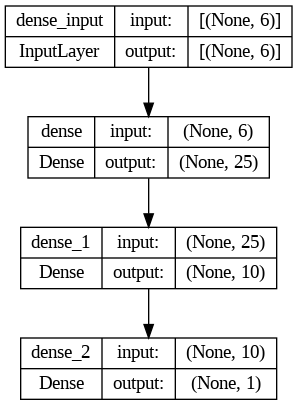

In [23]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [24]:
# test_x = np.zeros((1, 6)

# test_x[0, 0] = 2.23     # carat
# test_x[0, 1] = 61.5     # depth
# test_x[0, 2] = 55.0     # table
# test_x[0, 3] = 3        # cut_numeric
# test_x[0, 4] = 6        # clarity_numeric
# test_x[0, 5] = 5        # color_numeric
# test_x

test_x = np.zeros((1, 6))

test_x[0, 0] = 2.75     # carat
test_x[0, 1] = 55.3     # depth
test_x[0, 2] = 52.1     # table
test_x[0, 3] = 4        # cut_numeric
test_x[0, 4] = 5        # clarity_numeric
test_x[0, 5] = 5        # color_numeric
test_x

array([[ 2.75, 55.3 , 52.1 ,  4.  ,  5.  ,  5.  ]])

In [25]:
prediction = model.predict(test_x)
round(int(prediction[0]), 2)

1/1 [==============================] - 0s 21ms/step


28736